In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [14]:
!wget https://www.dropbox.com/s/t1webrwixdlaacv/space_ga.txt

--2019-09-22 18:28:44--  https://www.dropbox.com/s/t1webrwixdlaacv/space_ga.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t1webrwixdlaacv/space_ga.txt [following]
--2019-09-22 18:28:44--  https://www.dropbox.com/s/raw/t1webrwixdlaacv/space_ga.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6ec509a53675b81c8b4f847c7a.dl.dropboxusercontent.com/cd/0/inline/ApAt-XS8Iig7XNC6y6bNTxcqAHayZb0VkPaJS12kfQJ7cW3ZhGCTPzpSx-4zlzGWx5CFk_3NeYMDLFhYxih9g574W28w4Ef8tfiXwmAEQwA864u8yuAV-BEQ2riRh78vpCA/file# [following]
--2019-09-22 18:28:45--  https://uc6ec509a53675b81c8b4f847c7a.dl.dropboxusercontent.com/cd/0/inline/ApAt-XS8Iig7XNC6y6bNTxcqAHayZb0VkPaJS12kfQJ7cW3ZhGCTPzpSx-4zlzGWx5CFk_3NeYMDLFhYxih9g574W28w4Ef8tfiXwmAEQwA864u8yu

## Линейная регрессия с батч-оптимизацией(2 балла)

Рассмотрим случай, когда данных в выборке много. В таких случаях используется стохастическая или батч-оптимизация.

Загрузите данные из файла space_ga.csv и нормализуйте их. Мы будем предсказывать первый столбец по шести остальным. Эти данные получены с выборов в США в 1980 году.

In [15]:
df = pd.read_csv("space_ga.txt", header=None)
df.head()

,0,1,2,3,4,5,6
0,-0.661559,9.972920,9.246286,9.004054,12.134915,-86641472.0,32542207.0
1,-0.650859,10.903347,10.221214,9.965758,13.056638,-87754736.0,30654881.0
2,-0.617114,9.722205,8.753529,8.707648,11.630628,-85388993.0,31863073.0
3,-0.639070,9.273691,8.183118,8.277412,11.243712,-87126855.0,32996943.0
4,-0.700274,10.151519,9.207737,9.240676,12.155100,-86566214.0,33979740.0


Как вы могли заметить, датасет больше предыдущего. На нём мы попробуем батч-оптимизацию.

Измените функцию для минимизации написанную на семинаре так, чтобы на вход они принимала дополнительный параметр — размер батча. Запустите функцию при разных размерах батча. Прокомментируйте результаты.

In [16]:
x = df.values
df_normalized = preprocessing.Normalizer()
x_scaled = df_normalized.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3,4,5,6
0,-7.148025e-09,1.077556e-07,9.990447e-08,9.728719e-08,1.311156e-07,-0.936146,0.351613
1,-7.001878e-09,1.172972e-07,1.099588e-07,1.072107e-07,1.404621e-07,-0.944057,0.329782
2,-6.771046e-09,1.066731e-07,9.604466e-08,9.554125e-08,1.276125e-07,-0.936897,0.349605
3,-6.859484e-09,9.953953e-08,8.783382e-08,8.884593e-08,1.206848e-07,-0.935180,0.354174
4,-7.530114e-09,1.091603e-07,9.901175e-08,9.936594e-08,1.307051e-07,-0.930855,0.365388


In [0]:
L = lambda w, X, y: np.mean((X @ w - y)**2) / 2.
dL = lambda w, X, y: np.mean((X @ w - y)[..., None] * X, axis=0)
y = df[0].to_numpy().reshape(df.shape[0], 1)
X = df.to_numpy()

In [0]:
def optimize_and_plot_steps_minibatch(learning_rate, x_new=np.ones(df.shape[1]), batch_size=10):
    x_old = np.zeros(df.shape[1])
    eps = 0.0001
    minibatch = df.sample(batch_size)
    y = minibatch[0].to_numpy().reshape(batch_size, 1)
    minibatch[0] = np.ones(batch_size)
    X = minibatch.to_numpy()

    i = 0
    while np.mean(abs(x_new - x_old)) > eps:
        x_old = x_new
        minibatch = df.sample(batch_size)
        y = minibatch[0].to_numpy()
        minibatch[0] = np.ones(batch_size)
        X = minibatch.to_numpy()
        x_new = x_old - learning_rate * dL(x_old, X, y)
        i += 1
    return [x_new, i]

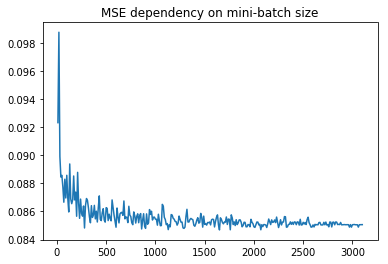

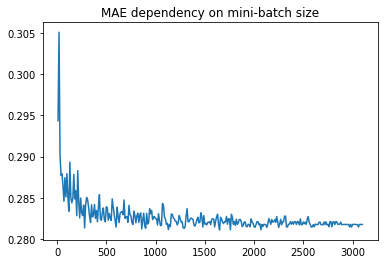

In [19]:
mse_s = []
mae_s = []
batch_sizes = []

i = 10
while i < df.shape[0]:
    [weights, steps] = optimize_and_plot_steps_minibatch(0.01, batch_size=i)
    Xw = X @ weights
    mse_s.append(mean_squared_error(Xw, y))
    mae_s.append(mean_absolute_error(Xw, y))
    batch_sizes.append(i)
    i+=10

plt.plot(batch_sizes, mse_s)
plt.title('MSE dependency on mini-batch size')
plt.show()

plt.plot(batch_sizes, mae_s)
plt.title('MAE dependency on mini-batch size')
plt.show()

Чем меньше размер батча, тем меньше ошибка (т.е. выше качество модели) и ниже скорость обработки датасета.

## Двумерная классификация(1 балл)

Решим задачу 2D классификации синтетических данных.



In [20]:
! wget https://files.catbox.moe/wv9vt6.npy -Otrain.npy
! wget https://files.catbox.moe/3ibsxd.npy -Otarget.npy

np.load("train.npy")

--2019-09-22 18:29:36--  https://files.catbox.moe/wv9vt6.npy
Resolving files.catbox.moe (files.catbox.moe)... 104.149.191.66
Connecting to files.catbox.moe (files.catbox.moe)|104.149.191.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13296 (13K) [application/octet-stream]
Saving to: ‘train.npy’

train.npy           100%[===================>]  12.98K  --.-KB/s    in 0s      

2019-09-22 18:29:36 (259 MB/s) - ‘train.npy’ saved [13296/13296]

--2019-09-22 18:29:37--  https://files.catbox.moe/3ibsxd.npy
Resolving files.catbox.moe (files.catbox.moe)... 104.149.191.66
Connecting to files.catbox.moe (files.catbox.moe)|104.149.191.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6688 (6.5K) [application/octet-stream]
Saving to: ‘target.npy’

target.npy          100%[===================>]   6.53K  --.-KB/s    in 0s      

2019-09-22 18:29:37 (1.34 GB/s) - ‘target.npy’ saved [6688/6688]



array([[ 1.20798057,  0.0844994 ],
       [ 0.76121787,  0.72510869],
       [ 0.55256189,  0.51937292],
       ...,
       [-1.22224754,  0.45743421],
       [ 0.43973452, -1.47275142],
       [ 1.4928118 ,  1.15683375]])

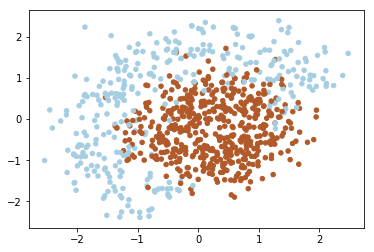

In [21]:
with open('train.npy', 'rb') as fin:
    X = np.load(fin)
    
with open('target.npy', 'rb') as fin:
    y = np.load(fin)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=20)
plt.show()


Как можно заметить, данные сверху линейно неразделимы. Поэтому мы должны добавить дополнительные признаки(или использовать нелинейную модель). Можно заметить, что гиперплоскость разделяющая два класса принимает форму круга, поэтому мы можем добавить квадратичные признаки чтобы сделать классы линейно разделимыми.


![](kernel.png)

In [0]:
def expand(X):
    """
    Adds quadratic features. 
    This expansion allows your linear model to make non-linear separation.
    
    For each sample (row in matrix), compute an expanded row:
    [feature0, feature1, feature0^2, feature1^2, feature0*feature1, 1]
    
    :param X: matrix of features, shape [n_samples,2]
    :returns: expanded features of shape [n_samples,6]
    """
    X_expanded = np.zeros((X.shape[0], 6))
    
    # TODO:<your code here>
    X_expanded[:, 0] = X[:, 0]
    X_expanded[:, 1] = X[:, 1]
    X_expanded[:, 2] = X[:, 0]**2
    X_expanded[:, 3] = X[:, 1]**2
    X_expanded[:, 4] = X[:, 0]*X[:, 1]
    X_expanded[:, 5] = np.ones((X.shape[0]))
    
    return X_expanded

In [0]:
X_expanded = expand(X)

In [24]:
# simple test on random numbers

dummy_X = np.array([
        [0,0],
        [1,0],
        [2.61,-1.28],
        [-0.59,2.1]
    ])

# call your expand function
dummy_expanded = expand(dummy_X)

# what it should have returned:   x0       x1       x0^2     x1^2     x0*x1    1
dummy_expanded_ans = np.array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ],
                               [ 1.    ,  0.    ,  1.    ,  0.    ,  0.    ,  1.    ],
                               [ 2.61  , -1.28  ,  6.8121,  1.6384, -3.3408,  1.    ],
                               [-0.59  ,  2.1   ,  0.3481,  4.41  , -1.239 ,  1.    ]])

#tests
assert isinstance(dummy_expanded,np.ndarray), "please make sure you return numpy array"
assert dummy_expanded.shape == dummy_expanded_ans.shape, "please make sure your shape is correct"
assert np.allclose(dummy_expanded,dummy_expanded_ans,1e-3), "Something's out of order with features"

print("Seems legit!")



Seems legit!


## Логистическая регрессия(3 балла)

Для классификации объектов мы будем получать вероятность того что объект принадлежит к классу '1'. Чтобы предсказывать вероятность мы будем использовать вывод линейной модели и логистической функции:


$$ a(x; w) = \langle w, x \rangle $$
$$ P( y=1 \; | \; x, \, w) = \dfrac{1}{1 + \exp(- \langle w, x \rangle)} = \sigma(\langle w, x \rangle)$$



In [0]:
def probability(X, w):
    """
    Given input features and weights
    return predicted probabilities of y==1 given x, P(y=1|x), see description above
        
    Don't forget to use expand(X) function (where necessary) in this and subsequent functions.
    
    :param X: feature matrix X of shape [n_samples,6] (expanded)
    :param w: weight vector w of shape [6] for each of the expanded features
    :returns: an array of predicted probabilities in [0,1] interval.
    """

    # TODO:<your code here>
    a = np.dot(X, w)
    p = 1./(1 + np.exp(-a))
    
    return p

In [0]:
dummy_weights = np.linspace(-1, 1, 6)
ans_part1 = probability(X_expanded[:1, :], dummy_weights)[0]

Для логистической регрессии оптимальное значение весов $w$ находится с помощью минимизации кросс-энтропии:


Loss для одного сэмпла: $$ l(x_i, y_i, w) = - \left[ {y_i \cdot log P(y_i = 1 \, | \, x_i,w) + (1-y_i) \cdot log (1-P(y_i = 1\, | \, x_i,w))}\right] $$

Loss для нескольких сэмплов: $$ L(X, \vec{y}, w) =  {1 \over \ell} \sum_{i=1}^\ell l(x_i, y_i, w) $$




In [0]:
def compute_loss(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute scalar loss function L using formula above.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    # TODO:<your code here>
    l, p = X.shape[0], probability(X, w)
    
    l1 = -1 * (y*np.log(p) + (1-y) * np.log(1-p))
    l2 = np.sum(l1)/l
    
    return l2


Т.к мы обучаем нашу модель с помощью градиентного спуска мы должны считать градиенты.
Для этого нам нужны производные функции потерь по каждому из весов.


$$ \nabla_w L = {1 \over \ell} \sum_{i=1}^\ell \nabla_w l(x_i, y_i, w) $$ 

Выведите формулу для подсчета градиента.


In [0]:
def compute_grad(X, y, w):
    """
    Given feature matrix X [n_samples,6], target vector [n_samples] of 1/0,
    and weight vector w [6], compute vector [6] of derivatives of L over each weights.
    Keep in mind that our loss is averaged over all samples (rows) in X.
    """
    
    # TODO<your code here>
    l = X.shape[0]
    p = probability(X, w)
    
    dL = p - y
    dwL = np.dot(dL, X)/float(l)
    
    return dwL

Вспомогательная функция для визуализации предсказаний:

In [0]:
from IPython import display

h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def visualize(X, y, w, history):
    """draws classifier prediction with matplotlib magic"""
    Z = probability(expand(np.c_[xx.ravel(), yy.ravel()]), w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.subplot(1, 2, 2)
    plt.plot(history)
    plt.grid()
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    plt.show()

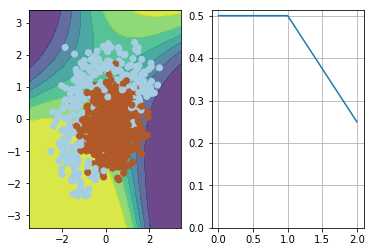

In [30]:
visualize(X, y, dummy_weights, [0.5, 0.5, 0.25])

## Обучение
В данной секции мы будем использовать функции, написанные вами, чтобы обучить наш классификатор с помощью стохастического градиентного спуска.


## Mini-batch SGD(1 балл)

Стохастический градиентный спуск берет рандомный батч из $m$ сэмплов на каждой итерации, подсчитывает градиент функции потерь на этом батче и делает шаг градиентного спуска:

$$ w_t = w_{t-1} - \eta \dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$




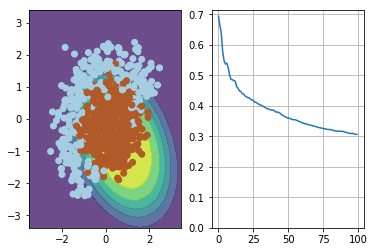

<Figure size 432x288 with 0 Axes>

In [31]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta= 0.1 # learning rate

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # Keep in mind that compute_grad already does averaging over batch for you!
    # TODO:<your code here>
    w = w - eta*compute_grad(X_expanded[ind, :], y[ind], w)

visualize(X, y, w, loss)
plt.clf()

## SGD with momentum(1 балл)

Momentum это метод позволяющий корректировать шаг SGD в нужное направление и уменьшать осцилляции как показано на рисунке. Данный эффект достигается с помощью добавления предыдущих шагов с коэффициентом $\alpha$ к текущему градиенту для каждого шага с обновлением весов.
<br>
<br>

$$ \nu_t = \alpha \nu_{t-1} + \eta\dfrac{1}{m} \sum_{j=1}^m \nabla_w l(x_{i_j}, y_{i_j}, w_t) $$
$$ w_t = w_{t-1} - \nu_t$$

<br>


![](sgd.png)



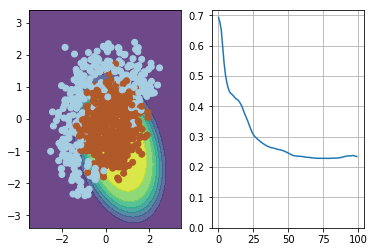

<Figure size 432x288 with 0 Axes>

In [32]:
np.random.seed(42)
w = np.array([0, 0, 0, 0, 0, 1])

eta = 0.05 # learning rate
alpha = 0.9 # momentum
nu = np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12, 5))

for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>
    nu = alpha*nu + eta*compute_grad(X_expanded[ind, :], y[ind], w)
    w = w - nu

visualize(X, y, w, loss)
plt.clf()

## ADAM(2 балла)
Реализуйте метод ADAM, использующий градиенты и квадраты градиентов сглаженные экспоненциальным скользящим средним:


\begin{eqnarray}
m_t &=& \beta_1 m_{t-1} + (1-\beta_1) g_t\\
s_t &=& \beta_2 s_{t-1} + (1-\beta_2) g_t^2 \\
w_t &=& w_{t-1} - \eta \times \frac{\sqrt{ 1 -  \beta_2^t}}{ 1 - \beta_1^t} \times \frac{ m_t }{ \sqrt{s_t+eps}}
\end{eqnarray}

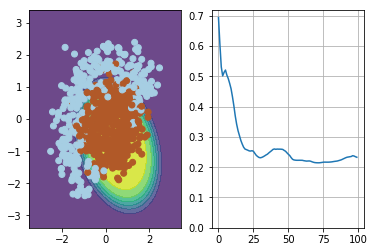

<Figure size 432x288 with 0 Axes>

In [33]:
np.random.seed(42)

w = np.array([0, 0, 0, 0, 0, 1.])

eta = 0.1 # learning rate
beta_1 = 0.9 # moving average of gradient
beta_2 = 0.999 # moving average of gradient norm squared
g = None # we start with None so that you can update this value correctly on the first iteration
eps = 1e-8
m, s = np.zeros_like(w), np.zeros_like(w)

n_iter = 100
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = np.random.choice(X_expanded.shape[0], batch_size)
    loss[i] = compute_loss(X_expanded, y, w)
    if i % 10 == 0:
        visualize(X_expanded[ind, :], y[ind], w, loss)

    # TODO:<your code here>
    g = compute_grad(X_expanded[ind, :], y[ind], w)
    m = beta_1*m + (1 - beta_1)*g
    s = beta_2*s + (1 - beta_2)*g**2
    w = w - eta*(np.sqrt(1 - beta_2) / (1 - beta_1))*(m / np.sqrt(s + eps))

visualize(X, y, w, loss)
plt.clf()